In [42]:
import pandas as pd
import numpy as np

## 점진적인 학습 이란
##### - 훈련에 필요한 데이터가 한번에 다 수집된 경우가 아니라,
##### - 시간 차를 두고 수집이 되는 경우에는 훈련모델 학습은 언제 해야 할까?
##### - 이런 문제를 해결하기 위해 수집될 때 마다 학습을 계속 이어나가는 훈련방식을
##### - "점진적인 학습" 이라고 합니다.
##### -->> "점진적인 학습" 또는 온라인 학습이라고 칭함
##### - 대표적인 점진적 학습 알고리즘은 "확률적 경사하강법" 입니다.

## 확률적 경사 하강법(SGD; Stochastic Gradient Descent)
##### - 경사 란 : 우리가 흔히 사용하는 단어인 경사(기울기) 입니다.
##### - 하강법 이란 : 내려가는 방법 입니다.
##### - 경사 하강법 이란 ?
##### ... : 원하는 지점에 도달하기 위해 가장 가파른 경사를 따라 내려가는 방법을 찾는 방법
##### - 확률적 이란 : "무작위하게" 또는 "랜덤하게"의 기술적 표현 언어 입니다.
#####  : 훈련데이터의 전체 특성들 중에서 하나씩 랜덤하게 선택하여 가장 가파른 길을 찾음
## <확률적 경사 하강법 순서>
##### 1. 훈련데이터에서 랜덤하게 하나의 특성을 선택
##### 2. 선택한 특성을 이용하여 경사를 조금씩(아주조금씩) 내려갑니다.
##### 3. 내려 갈 수 있을 때 까지 내려갑니다.
##### 4. 훈련 세트에서 다른 특성을 랜덤하게 또 다시 하나 선택 
##### 4. 선택된 특성을 이용해서 경사를 조금씩 내려갈 수 있을 때 까지 내려간다.

## 1. 데이터 준비하기

In [43]:
file_path = './data/07_fish.csv'
fish = pd.read_csv(file_path)
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [44]:
# 결측치 확인
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [45]:
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


## 2. 데이터 전처리

In [46]:
### 독립변수와 종속변수 분리하여 변수화
# 독립변수명 : fish_input
# 종속변수명 : fish_target

In [47]:
fish_target = fish['Species'].to_numpy()
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [48]:
### 훈련(입력, 타겟), 테스트(입력, 타겟) 데이터 분류하기
from sklearn.model_selection import train_test_split

In [49]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_input, fish_target, random_state=42)
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(119, 5)
(119,)
(40, 5)
(40,)


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 확률적 경사 하강법을 이용한 분류

In [ ]:
### 객체(모델) 생성하기
# - loss : 손실함수 (log=로지스틱 손실함수 사용)
#        : 조금씩 내려오면서 손실이 작은쪽을 찾아서 내려오기 위한 방법
#        : 사람은 손실이 작은 값들을 알 수 없습니다.
#          (학습모델이 가지고 있는 손실 계산식을 통해 결정합니다.)
#        : 분류 결과에 만족한다면, 다 내려왔다고 인정해야 함
#          (범주가 2개인 이진분류시에 log를 사용합니다.)
#        : 사람이 직접 만들거나 직접 계산하지는 않음(관여하지 않음)
#        : 훈련모델이 직접 수행
#        : 사람은 분류 성격에 맞게 사용할 손실함수를 지정만 합니다.
# - max_iter : 훈련 반복 횟수 
#            (전체 특성이 다 끝나면 1회로 본다 -> 이를 "에포크"라 함)
#        : 훈련 반복 회수가 부족한 경우 다 내려오기 전에 끝..?
#        : 분류 정확도가 낮아질수도(과소적합), 높아질수도(과대적합)
#        : 가장 적합한 반복 시점(에포크)을 찾아야 함..
#          (에포크는 사람이 찾아서 max_iter에 넣어 줄 수 있음)

In [52]:
### 사용 클래스(모델) : SGDClassifier

from sklearn.linear_model import SGDClassifier

In [74]:
# 클래스(모델) 생성
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

In [75]:
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\DEV\Tools\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\DEV\Tools\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [76]:
### 점진적 학습 시작
# 새로운 데이터가 들어왔다고 가정..(실제로는 새로운 데이터 사용)
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


C:\DEV\Tools\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


## 에포크 반복횟수 찾기

In [98]:
sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [103]:
### 최적의 에포크 위치확인하기 : 시각화
import matplotlib.pyplot as plt

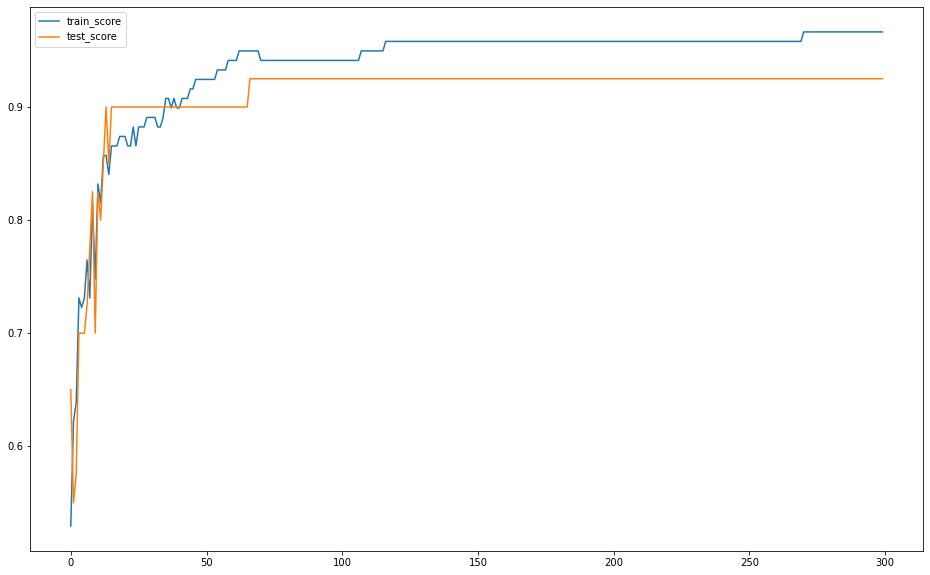

In [109]:
plt.figure(figsize=(16,10))
plt.plot(train_score, label='train_score')
plt.plot(test_score, label='test_score')
plt.legend()
plt.show()

In [120]:
# 클래스(모델) 생성
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)

In [121]:
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


## 모델 예측값 데이터프레임에 저장하기

In [ ]:
##### [문제]
##### - 새로운 데이터가 수집되었다고 가정하고 예측을 통해 결과값 저장하기
# - 기존 fish 데이터 전체를 신규데이터라고 가정하고 진행
# - 신규 데이터는 Weight, Length, Diagonal, Height, Width
#   (데이터프레임 변수는 별도로 만들어서 사용)

##### - 데이터프레임에 예측결과에 대한 Species_pred 컬럼 추가

##### <출력 결과>
# - Species_pred가 추가된 데이터프레임 출력
#   (출력결과)데이터프레임의 7개 컬럼 모두 출력
#   Weight, Length, Diagonal, Height, Width, Species, Species_pred

# - 정답을 맞춘 갯수와 틀린 갯수 출력하기
#   (출력 예시) 총 갯수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건

# - 정답률과 오답률 출력하기
#   (출력 예시) 총 100.0% 중 정답률[93.71%], 오답률[6.29%]

In [133]:
fish_test = fish.copy()
fish_test_input = fish_test[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [135]:
fish_test_scaled = ss.transform(fish_test_input)

In [140]:
fish_test_pred = sc.predict(fish_test_scaled)
fish_test_series = pd.Series(fish_test_pred)
fish_test['Species_pred'] = fish_test_series
fish_test

,Species,Weight,Length,Diagonal,Height,Width,Species_pred
0,Bream,242.0,25.4,30.0,11.5200,4.0200,Bream
1,Bream,290.0,26.3,31.2,12.4800,4.3056,Bream
2,Bream,340.0,26.5,31.1,12.3778,4.6961,Bream
3,Bream,363.0,29.0,33.5,12.7300,4.4555,Bream
4,Bream,430.0,29.0,34.0,12.4440,5.1340,Bream
...,...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936,Smelt
155,Smelt,13.4,12.4,13.5,2.4300,1.2690,Smelt
156,Smelt,12.2,13.0,13.8,2.2770,1.2558,Smelt
157,Smelt,19.7,14.3,15.2,2.8728,2.0672,Smelt


In [151]:
print('총 갯수 [{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건'.format(len(fish_test), \
    sum(fish_test['Species'] == fish_test['Species_pred']), \
    len(fish_test)-sum(fish_test['Species'] == fish_test['Species_pred'])))

총 갯수 [159]건 중에, 정답갯수[151]건, 오답 갯수[8]건


In [160]:
print('총 100.0% 중 정답률[{}%], 오답률[{}%]' \
      .format(round(sum(fish_test['Species'] == fish_test['Species_pred'])/len(fish_test) * 100, 2), \
              round(100 - sum(fish_test['Species'] == fish_test['Species_pred'])/len(fish_test) * 100, 2)))

총 100.0% 중 정답률[94.97%], 오답률[5.03%]
